## Self-Attention in TransformerEncoder
Self-attention is the core mechanism of Transformer-based models like BERT, GPT, and T5. It helps the model focus on different words in a sentence depending on context.

A regular RNN/LSTM would process words sequentially, meaning it might not fully understand that "it" refers to "cat".

Self-attention allows the model to "look" at all words at once and decide which words are most important for the current word.
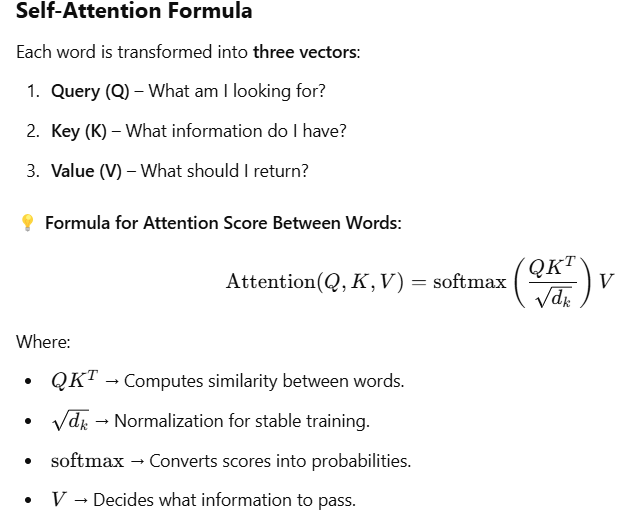

## self-attention TransformerEncoder
from torch.nn import TransformerEncoder, TransformerEncoderLayer

✅ Understands long-term dependencies better than RNNs.

✅ Parallel processing (RNNs process sequentially, Transformers process all words at once).

✅ Higher accuracy on NLP tasks like translation, summarization, and text generation.

✅ Used in BERT, GPT, T5, and modern AI models.

Transformer-based Text Classifier --> TransformerEncoder in PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class TransformerClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_heads, hidden_dim, num_layers, output_dim):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Convert words to embeddings
        self.positional_encoding = nn.Parameter(torch.zeros(1, 500, embedding_dim))  # Positional encoding
        encoder_layer = TransformerEncoderLayer(d_model=embedding_dim, nhead=num_heads)
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers)  # Stack multiple layers
        self.fc = nn.Linear(embedding_dim, output_dim)  # Fully connected output layer

    def forward(self, x):
        x = self.embedding(x) + self.positional_encoding[:, :x.size(1), :]  # Add positional encoding
        x = self.transformer_encoder(x)  # Pass through Transformer
        x = self.fc(x[:, 0, :])  # Use first token for classification
        return x


### Self-Attention in Vision (Images)

CNNs are great for local features (edges, textures) using filters.

But CNNs struggle to capture long-range dependencies — like relating the top-left corner to the bottom-right.

✅ Self-Attention helps:

Understand global context of the image.

Replace or enhance convolutional layers.



### Option 1: Self-Attention in CNNs (Lightweight)
We’ll enhance a CNN (like ResNet) using self-attention in a custom module.

Add Self-Attention Block in a CNN

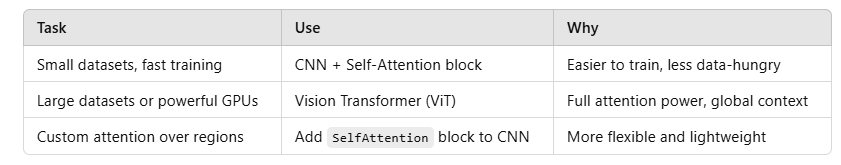

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Self-Attention Block (Spatial attention over image)
class SelfAttention(nn.Module):
    def __init__(self, in_channels):
        super(SelfAttention, self).__init__()
        self.query = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.key   = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.value = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.gamma = nn.Parameter(torch.zeros(1))  # Learnable weight

    def forward(self, x):
        batch_size, C, H, W = x.size()
        Q = self.query(x).view(batch_size, -1, H * W).permute(0, 2, 1)  # (B, H*W, C')
        K = self.key(x).view(batch_size, -1, H * W)  # (B, C', H*W)
        attention = torch.bmm(Q, K)  # (B, H*W, H*W)
        attention = F.softmax(attention / (C ** 0.5), dim=-1)

        V = self.value(x).view(batch_size, -1, H * W)  # (B, C, H*W)
        out = torch.bmm(V, attention.permute(0, 2, 1))  # (B, C, H*W)
        out = out.view(batch_size, C, H, W)
        return self.gamma * out + x  # Residual connection


model = AttentionCNN(num_classes=10)
img = torch.randn(8, 3, 64, 64)  # Batch of 8 RGB images
out = model(img)
print(out.shape)  # → (8, 10)


## Option 2: Vision Transformer (ViT) in PyTorch

🚀 Use Pretrained ViT from torchvision (PyTorch >= 2.0)

In [ ]:
import torchvision.models as models

model = models.vit_b_16(weights='IMAGENET1K_V1')  # Vision Transformer Base, 16x16 patches
model.eval()

# Input: (B, 3, 224, 224)
img = torch.randn(1, 3, 224, 224)
output = model(img)
print(output.shape)  # → (1, 1000) → ImageNet classes
